In [19]:
import pandas as pd
import numpy as np

In [20]:
df=pd.read_csv("//content//flipkart_product.csv", encoding="latin1")

In [21]:
df=df.dropna()

In [22]:
#Remove punctuation of ProductName
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [23]:
#Remove punctuation of df[ProductName]
def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree
#Apply function df[ProductName]
df["ProductName"]=df["ProductName"].apply(lambda x:remove_punctuation(x))

In [24]:
df['Price'] = df['Price'].str.replace(r'[^\d.]', '', regex=True).astype(float)

In [25]:
#duplicates
df.duplicated().sum()

25046

In [26]:
#drop duplicates,keep first
df=df.drop_duplicates(keep='first')

In [27]:
df.shape

(164811, 5)

In [28]:
import spacy
nlp = spacy.load("en_core_web_sm")

In [29]:
# Function to extract entities
def extract_entities(text):
    doc = nlp(text)
    brand = []
    capacity = []
    product_type = []
    color = []
    features = []

    # Named Entity Recognition (NER)
    for ent in doc.ents:
        if ent.label_ in ["ORG"]:
            brand.append(ent.text)
        elif ent.label_ == "PRODUCT":
            product_type.append(ent.text)
        elif ent.label_ == "CARDINAL" or ent.label_ == "QUANTITY":
            capacity.append(ent.text)
        elif ent.label_ == "COLOR":
            color.append(ent.text)
        else:
            features.append(ent.text)

    return pd.Series({
        'Brand': ' '.join(brand),
        'Capacity': ' '.join(capacity),
        'Type': ' '.join(product_type),
        'Color': ' '.join(color),
        'Features': ' '.join(features)
    })

# Apply the function to the ProductName column
df[['Brand', 'Capacity', 'Type', 'Color', 'Features']] = df['ProductName'].apply(extract_entities)
# Save the updated DataFrame to a new CSV file
#df.to_csv('updated_dataset.csv', index=False)

In [42]:
# Fill empty cells with default values
df['Brand'] = df.apply(lambda row: row['Brand'] if row['Brand'] else row['ProductName'].split()[0], axis=1)
df['Capacity'] = df.apply(lambda row: row['Capacity'] if row['Capacity'] else ' '.join(row['ProductName'].split()[1:3]), axis=1)
df['Type'] = df.apply(lambda row: row['Type'] if row['Type'] else ' '.join(row['ProductName'].split()[3:6]), axis=1)
df['Color'] = df.apply(lambda row: row['Color'] if row['Color'] else ' '.join(row['ProductName'].split()[-5:-2]), axis=1)
df['Features'] = df.apply(lambda row: row['Features'] if row['Features'] else ' '.join(row['ProductName'].split()[-2:]), axis=1)


In [44]:
df.head()

,ProductName,Price,Rate,Review,Summary,Brand,Capacity,Type,Color,Features
0,Candes 12 L RoomPersonal Air CoolerÿÿWhite Bla...,3999.0,5,Super!,Great cooler.. excellent air flow and for this...,Candes,12,RoomPersonal Air,Cooling Pad Ice,Chamber Blower
1,Candes 12 L RoomPersonal Air CoolerÿÿWhite Bla...,3999.0,5,Awesome,Best budget 2 fit cooler. Nice cooling,Candes,12,RoomPersonal Air,Cooling Pad Ice,Chamber Blower
2,Candes 12 L RoomPersonal Air CoolerÿÿWhite Bla...,3999.0,3,Fair,The quality is good but the power of air is de...,Candes,12,RoomPersonal Air,Cooling Pad Ice,Chamber Blower
3,Candes 12 L RoomPersonal Air CoolerÿÿWhite Bla...,3999.0,1,Useless product,Very bad product it's a only a fan,Candes,12,RoomPersonal Air,Cooling Pad Ice,Chamber Blower
4,Candes 12 L RoomPersonal Air CoolerÿÿWhite Bla...,3999.0,3,Fair,Ok ok product,Candes,12,RoomPersonal Air,Cooling Pad Ice,Chamber Blower


In [48]:
df["Brand"].value_counts().head()

,count
Brand,
cello,7073
MILTON,5941
Mi,3931
Home,3662
SAMSUNG,3634


In [49]:
df["Capacity"].value_counts().head()

,count
Capacity,
18 18,7073
Thermosteel Flip,5941
2,3667
153 cm 2Â Â,3181
144 1,2995


In [45]:
df["Type"].value_counts()

,count
Type,
18 Opalware,7073
Lid 500,5941
Cotton Double,3440
cm 32,3234
cm 502,3181
...,...
W Garment,10
Black White,9
and Date,8


In [39]:
df["Color"].value_counts()

,count
Color,
Pack of 1,7932
SetÂ Â White,7073
Â Finish Color,6927
Â Pack of,3965
Of 2Â Â,3562
...,...
Self Design Beige,10
Cooling Pad Ice,10
Minimalists Analog Watch,9


In [41]:
df["Features"].value_counts()

,count
Features,
Microwave Safe,7073
Â Black,6736
Silver Steel,5941
Floral Brown,3562
GB,3119
...,...
Formal BlazerÿÿMaroon,10
Chamber Blower,10
Khadi Cotton Printed Black White Men,9


In [51]:
df["Summary"].value_counts()

,count
Summary,
Good,5809
Nice,3805
Good product,2911
Nice product,2240
Super,1682
...,...
Excellent product I can't define it becoz it is too much good product at this price..,1
Nice product ð.... thanks Flipkart â¤ï¸,1
Machine got wrong within one month,1


In [52]:
#!pip install nltk

import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [53]:
# Initialize VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Function to determine sentiment type
def determine_sentiment(summary):
    if not summary or summary.strip() == "":
        return "Neutral"

    # Analyze sentiment
    score = sia.polarity_scores(summary)

    # Determine sentiment type based on the compound score
    if score['compound'] >= 0.05:
        return "Positive"
    elif score['compound'] <= -0.05:
        return "Negative"
    else:
        return "Neutral"


In [54]:
# Apply the sentiment analysis function to the Summary column
df['SummaryType'] = df['Summary'].apply(determine_sentiment)

In [55]:
df.head()

,ProductName,Price,Rate,Review,Summary,Brand,Capacity,Type,Color,Features,SummaryType
0,Candes 12 L RoomPersonal Air CoolerÿÿWhite Bla...,3999.0,5,Super!,Great cooler.. excellent air flow and for this...,Candes,12,RoomPersonal Air,Cooling Pad Ice,Chamber Blower,Positive
1,Candes 12 L RoomPersonal Air CoolerÿÿWhite Bla...,3999.0,5,Awesome,Best budget 2 fit cooler. Nice cooling,Candes,12,RoomPersonal Air,Cooling Pad Ice,Chamber Blower,Positive
2,Candes 12 L RoomPersonal Air CoolerÿÿWhite Bla...,3999.0,3,Fair,The quality is good but the power of air is de...,Candes,12,RoomPersonal Air,Cooling Pad Ice,Chamber Blower,Positive
3,Candes 12 L RoomPersonal Air CoolerÿÿWhite Bla...,3999.0,1,Useless product,Very bad product it's a only a fan,Candes,12,RoomPersonal Air,Cooling Pad Ice,Chamber Blower,Negative
4,Candes 12 L RoomPersonal Air CoolerÿÿWhite Bla...,3999.0,3,Fair,Ok ok product,Candes,12,RoomPersonal Air,Cooling Pad Ice,Chamber Blower,Positive


In [56]:
df["SummaryType"].value_counts()

,count
SummaryType,
Positive,124826
Negative,20756
Neutral,19229


In [58]:
# Display the DataFrame with the new SummaryType column
df[['Summary', 'SummaryType']].head()

,Summary,SummaryType
0,Great cooler.. excellent air flow and for this...,Positive
1,Best budget 2 fit cooler. Nice cooling,Positive
2,The quality is good but the power of air is de...,Positive
3,Very bad product it's a only a fan,Negative
4,Ok ok product,Positive


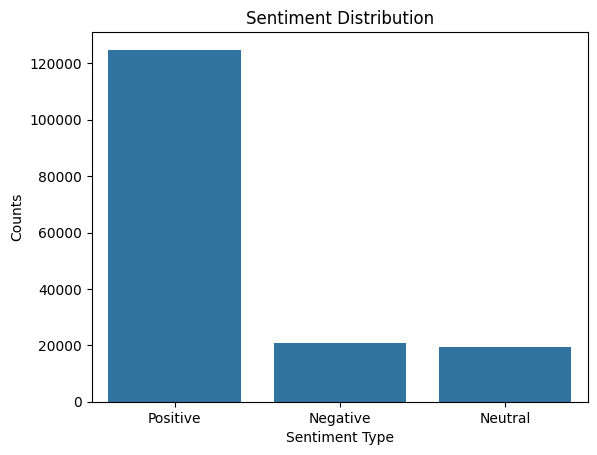

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns
sentiment_counts = df['SummaryType'].value_counts()
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Type')
plt.ylabel('Counts')
plt.show()


In [60]:
!pip install gensim pyLDAvis

import gensim
from gensim import corpora
from gensim.models import LdaModel
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis


def preprocess_text(text):

    return [word.lower() for word in text.split() if len(word) > 3]

texts = df['Summary'].dropna().apply(preprocess_text)


dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]


lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=5, passes=10)


for idx, topic in lda_model.print_topics(-1):
    print(f"Topic {idx+1}: {topic}")
lda_vis = gensimvis.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(lda_vis)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 21.9 MB/s eta 0:00:00
Topic 1: 0.095*"best" + 0.074*"quality" + 0.058*"awesome" + 0.048*"very" + 0.039*"small" + 0.035*"thanks" + 0.026*"flipkart" + 0.025*"size" + 0.019*"great" + 0.016*"good."
Topic 2: 0.262*"good" + 0.169*"product" + 0.149*"very" + 0.127*"nice" + 0.034*"quality" + 0.012*"delivery" + 0.010*"ð" + 0.009*"product." + 0.007*"it's" + 0.007*"happy"
Topic 3: 0.026*"this" + 0.018*"with" + 0.013*"after" + 0.013*"installation" + 0.013*"have" + 0.012*"water" + 0.012*"working" + 0.011*"from" + 0.009*"time" + 0.009*"sound"
Topic 4: 0.075*"product" + 0.073*"this" + 0.040*"money" + 0.035*"flipkart" + 0.032*"value" + 0.024*"really" + 0.023*"thank" + 0.022*"worth" + 0.022*"amazing" + 0.020*"price"
Topic 5: 0.058*"super" + 0.047*"excellent" + 0.030*"products" + 0.024*"easy" + 0.022*"superb" + 0.016*"performance" + 0.011*"fast" + 0.010*"smart" + 0.010*"high" + 0.010*"battery"


In [64]:
from textblob import TextBlob

def get_sentiment_textblob(text):
    if not text or text.strip() == "":
        return "Neutral"
    analysis = TextBlob(text)
    polarity = analysis.sentiment.polarity
    if polarity > 0:
        return "Positive"
    elif polarity < 0:
        return "Negative"
    else:
        return "Neutral"

df['SummaryType'] = df['Summary'].apply(get_sentiment_textblob)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [65]:
positive_reviews = df[df['SummaryType'] == 'Positive']

brand_positive_counts = positive_reviews['Brand'].value_counts()
brand_positive_counts

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,count
Brand,
cello,5542
MILTON,4853
Mi,3199
Home,3099
SAMSUNG,3040
...,...
Remote Control Blue,5
NEELAM RED Preassembled,4
CHARDI,4


In [66]:
most_positive_brand = brand_positive_counts.idxmax()
most_positive_count = brand_positive_counts.max()
print(f"Most Positive Brand: {most_positive_brand} with {most_positive_count} positive reviews.")

Most Positive Brand: cello with 5542 positive reviews.


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [68]:
#most Negetive summarytype which brand and max negetive by brand
negative_reviews = df[df['SummaryType'] == 'Negative']
brand_negative_counts = negative_reviews['Brand'].value_counts()
brand_negative_counts


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,count
Brand,
cello,764
Men,659
MILTON,367
Mi,353
Men Cargos,339
...,...
SUPRIMO,1
QUANTUM,1
GaxQuly Multipurpose Vegetable Fruit Handy Chopper Machine,1


In [71]:
#highest  negetive brand
most_negative_brand = brand_negative_counts.idxmax()
most_negative_count = brand_negative_counts.max()
print(f"Most Negative Brand: {most_negative_brand} with {most_negative_count} negative reviews.")

Most Negative Brand: cello with 764 negative reviews.


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [72]:
#which brand are not negetive review
neutral_reviews = df[df['SummaryType'] == 'Neutral']
brand_neutral_counts = neutral_reviews['Brand'].value_counts()
brand_neutral_counts


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,count
Brand,
cello,767
MILTON,721
Men,414
SAMSUNG,401
Mi,379
...,...
Rudra,1
LG DFB424FP Free,1
Khatu,1


In [73]:
#Which brand has never received a negative review?
most_neutral_brand = brand_neutral_counts.idxmax()
most_neutral_count = brand_neutral_counts.max()
print(f"Most Neutral Brand: {most_neutral_brand} with {most_neutral_count} neutral reviews.")

Most Neutral Brand: cello with 767 neutral reviews.


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [75]:
#Which type of brand has never received a negative review?based type,color

negative_reviews = df[df['SummaryType'] == 'Negative']

negative_combinations = negative_reviews.groupby(['Brand', 'Type', 'Color']).size().reset_index()[['Brand', 'Type', 'Color']]
positive_only_combinations = df.groupby(['Brand', 'Type', 'Color']).size().reset_index()[['Brand', 'Type', 'Color']]
positive_only_combinations = positive_only_combinations.merge(negative_combinations, on=['Brand', 'Type', 'Color'], how='left', indicator=True)
positive_only_combinations = positive_only_combinations[positive_only_combinations['_merge'] == 'left_only'].drop(columns='_merge')
positive_only_combinations


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Brand,Type,Color
1,38024PP25,Watch For,Minimalists Analog Watch
5,77085PP03,Watch For,Volt Analog Watch
13,ALUMINIUM BASED COMMERCIAL JUG POWERMATIC,ALUMINIUM BASED,900 Juicer 1
23,Acnos Wood Portable Laptop TableÂ Â Finish Col...,Laptop TableÂ,TableÂ Â Finish
54,BAJAJ,W Food,FX7 600 W
76,BeeSmart Semi Automatic Water Level Controller...,Water Level,BEEWLC2 Wired Sensor
103,CELLBELL,High Back,Arm ChairÂ Â
118,CRAFTIFY,Spiral 2000,2000 W Immersion
158,DDecora,450 ML,Vegetable Fruit ChopperÂ
163,DOJI,colorWarmWhitespot lightfocus,Lights Ceiling LampÂ
